In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import math
import tensorflow as tf
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


/kaggle/input/kaggle-stock-market-prediction/1_train.csv
/kaggle/input/kaggle-stock-market-prediction/4_train.csv
/kaggle/input/kaggle-stock-market-prediction/3_train.csv
/kaggle/input/kaggle-stock-market-prediction/test.csv
/kaggle/input/kaggle-stock-market-prediction/2_train.csv


In [2]:
df1 = pd.read_csv("/kaggle/input/kaggle-stock-market-prediction/1_train.csv")
df2 = pd.read_csv("/kaggle/input/kaggle-stock-market-prediction/2_train.csv")
df3 = pd.read_csv("/kaggle/input/kaggle-stock-market-prediction/3_train.csv")
df4 = pd.read_csv("/kaggle/input/kaggle-stock-market-prediction/4_train.csv")
df1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,9.50,9.47,9.23,9.04,7.93,1.133345e+09
1,2010-06-30,9.25,9.22,9.00,8.70,7.52,7.394520e+08
2,2010-07-01,9.01,9.02,8.63,8.94,7.45,1.022896e+09
3,2010-07-02,8.98,8.96,8.74,8.85,7.68,6.938428e+08
4,2010-07-06,9.13,9.13,8.61,9.36,7.68,6.152356e+08


In [3]:
df1.info

<bound method DataFrame.info of             Date   Open   High    Low  Close  Adj Close        Volume
0     2010-06-29   9.50   9.47   9.23   9.04       7.93  1.133345e+09
1     2010-06-30   9.25   9.22   9.00   8.70       7.52  7.394520e+08
2     2010-07-01   9.01   9.02   8.63   8.94       7.45  1.022896e+09
3     2010-07-02   8.98   8.96   8.74   8.85       7.68  6.938428e+08
4     2010-07-06   9.13   9.13   8.61   9.36       7.68  6.152356e+08
...          ...    ...    ...    ...    ...        ...           ...
2525  2020-07-10  95.36  95.86  94.83  95.53      94.51  9.025720e+07
2526  2020-07-13  97.41  99.85  95.33  97.02      93.98  1.916492e+08
2527  2020-07-14  94.81  97.15  93.66  97.58      95.63  1.709892e+08
2528  2020-07-15  99.06  99.18  96.41  96.67      96.28  1.531980e+08
2529  2020-07-16  96.49  97.55  95.94  96.17      95.18  1.105776e+08

[2530 rows x 7 columns]>

In [4]:
df1.dropna(inplace=True)

In [5]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1 = df1.astype({"Open": float, "Volume": float, "Close":float, "High":float, "Low":float, "Adj Close":float})

In [6]:
df1 = df1.sort_values(by = 'Date', ignore_index = True)
df4 = df4.sort_values(by = 'Date', ignore_index = True)

In [7]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2.530000e+03
mean,31.157111,31.464870,30.864387,31.211336,29.075569,2.740761e+08
std,17.325480,17.545733,17.151493,17.413014,17.584420,2.121083e+08
min,8.330000,8.580000,8.290000,8.490000,7.270000,4.544800e+07
25%,18.470000,18.642500,18.355000,18.482500,16.052500,1.194368e+08
50%,26.985000,27.230000,26.795000,27.065000,24.745000,2.004314e+08
75%,41.597500,42.175000,41.097500,41.677500,39.787500,3.727283e+08
max,99.060000,99.850000,96.410000,97.580000,96.280000,1.880998e+09


In [8]:
df2.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,5.73,5.94,5.19,5.49,5.52,257326000.0
1,2010-06-30,5.49,5.73,5.28,5.38,5.36,194814000.0
2,2010-07-01,5.48,5.61,5.47,5.45,5.65,170596000.0
3,2010-07-02,5.64,5.45,5.56,5.54,5.42,89542000.0
4,2010-07-06,5.58,5.49,5.44,5.67,5.61,104386000.0


In [9]:
df2.info

<bound method DataFrame.info of             Date    Open    High     Low   Close  Adj Close       Volume
0     2010-06-29    5.73    5.94    5.19    5.49       5.52  257326000.0
1     2010-06-30    5.49    5.73    5.28    5.38       5.36  194814000.0
2     2010-07-01    5.48    5.61    5.47    5.45       5.65  170596000.0
3     2010-07-02    5.64    5.45    5.56    5.54       5.42   89542000.0
4     2010-07-06    5.58    5.49    5.44    5.67       5.61  104386000.0
...          ...     ...     ...     ...     ...        ...          ...
2525  2020-07-10  159.46  160.78  156.69  155.17     159.99  109720000.0
2526  2020-07-13  162.51  167.29  153.21  154.22     155.16  154408000.0
2527  2020-07-14  154.55  156.58  147.63  150.41     154.21  144638000.0
2528  2020-07-15  154.06  154.82  148.73  150.04     150.39  115778000.0
2529  2020-07-16  148.37  151.63  145.88  148.01     150.01  127884000.0

[2530 rows x 7 columns]>

In [10]:
df2.dropna(inplace=True)
df2["Date"] = pd.to_datetime(df2["Date"])
df2 = df2.astype({"Open": float, "Volume": float, "Close":float, "High":float, "Low":float, "Adj Close":float})
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2.530000e+03
mean,39.350929,39.758130,38.901684,39.411652,39.353498,8.756023e+07
std,33.464502,33.837726,33.069605,33.542876,33.478299,5.100261e+07
min,5.230000,5.450000,5.190000,5.380000,5.360000,1.762600e+07
25%,12.870000,12.992500,12.730000,12.882500,12.890000,5.549100e+07
50%,22.140000,22.420000,21.975000,22.280000,22.120000,7.474000e+07
75%,62.852500,62.967500,62.055000,63.465000,62.630000,1.033310e+08
max,162.510000,167.290000,156.690000,160.160000,159.990000,8.484220e+08


In [11]:
df3.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,2.76,2.63,2.48,2.59,2.38,66080800.0
1,2010-06-30,2.62,2.54,2.73,2.46,2.15,62307200.0
2,2010-07-01,2.48,2.46,2.55,2.66,2.46,73700800.0
3,2010-07-02,2.79,2.74,2.52,2.41,2.41,73709600.0
4,2010-07-06,2.34,2.60,2.69,2.60,2.26,71202000.0


### 

In [12]:
df3.info

<bound method DataFrame.info of             Date    Open    High     Low   Close  Adj Close      Volume
0     2010-06-29    2.76    2.63    2.48    2.59       2.38  66080800.0
1     2010-06-30    2.62    2.54    2.73    2.46       2.15  62307200.0
2     2010-07-01    2.48    2.46    2.55    2.66       2.46  73700800.0
3     2010-07-02    2.79    2.74    2.52    2.41       2.41  73709600.0
4     2010-07-06    2.34    2.60    2.69    2.60       2.26  71202000.0
...          ...     ...     ...     ...     ...        ...         ...
2525  2020-07-10  105.69  106.60  103.97  100.45     104.59  49767600.0
2526  2020-07-13  105.84  107.91  100.30  103.76     100.22  45707600.0
2527  2020-07-14  100.73  104.00   98.05  102.24     103.65  54267600.0
2528  2020-07-15  103.92  104.38  100.59  101.27     102.09  40398400.0
2529  2020-07-16  100.10  101.90   98.99  102.13     101.25  34496400.0

[2530 rows x 7 columns]>

In [13]:
df3.dropna(inplace=True)
df3["Date"] = pd.to_datetime(df3["Date"])
df3 = df3.astype({"Open": float, "Volume": float, "Close":float, "High":float, "Low":float, "Adj Close":float})
df3.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2.530000e+03
mean,21.464719,21.807889,21.111696,21.512372,21.184036,5.128641e+07
std,23.724395,24.113423,23.311978,23.785553,23.677313,3.419648e+07
min,2.080000,2.230000,1.990000,2.110000,1.940000,4.564400e+06
25%,3.770000,3.840000,3.730000,3.790000,3.492500,2.995540e+07
50%,5.710000,5.755000,5.600000,5.730000,5.480000,4.229940e+07
75%,40.502500,41.227500,39.820000,40.497500,40.150000,6.252820e+07
max,105.840000,107.910000,103.970000,105.230000,104.660000,3.692928e+08


In [14]:
df4.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-02-2011,1.74,1.73,1.62,1.53,1.51,10617000.0
1,01-02-2012,2.04,1.95,1.85,2.13,1.97,7848000.0
2,01-02-2013,2.41,2.39,2.48,2.49,2.57,16509000.0
3,01-02-2016,12.65,13.27,12.25,12.04,13.19,79464000.0
4,01-02-2017,16.90,16.84,16.59,16.89,16.47,59382000.0


In [15]:
df4.info


<bound method DataFrame.info of             Date   Open   High    Low  Close  Adj Close       Volume
0     01-02-2011   1.74   1.73   1.62   1.53       1.51   10617000.0
1     01-02-2012   2.04   1.95   1.85   2.13       1.97    7848000.0
2     01-02-2013   2.41   2.39   2.48   2.49       2.57   16509000.0
3     01-02-2016  12.65  13.27  12.25  12.04      13.19   79464000.0
4     01-02-2017  16.90  16.84  16.59  16.89      16.47   59382000.0
...          ...    ...    ...    ...    ...        ...          ...
2525  31-12-2013  10.23  10.26  10.03  10.06      10.10   63936000.0
2526  31-12-2014  14.68  14.96  14.81  14.70      14.74   34462500.0
2527  31-12-2015  15.82  16.26  15.79  14.95      15.96   40725000.0
2528  31-12-2018  22.49  22.57  21.72  20.66      22.17   94534500.0
2529  31-12-2019  26.97  28.08  26.75  28.49      27.97  154285500.0

[2530 rows x 7 columns]>

In [16]:
df4.dropna(inplace=True)
df4["Date"] = pd.to_datetime(df4["Date"])
df4 = df4.astype({"Open": float, "Volume": float, "Close":float, "High":float, "Low":float, "Adj Close":float})
df4.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000,2.530000e+03
mean,14.314937,14.603198,14.020731,14.360336,14.323581,9.152483e+07
std,12.196837,12.543394,11.836304,12.328137,12.214683,8.572465e+07
min,0.970000,1.070000,1.000000,0.920000,1.050000,1.777500e+06
25%,2.380000,2.410000,2.340000,2.370000,2.400000,3.054338e+07
50%,14.545000,14.775000,14.255000,14.490000,14.570000,7.201575e+07
75%,19.027500,19.407500,18.667500,19.077500,19.080000,1.185364e+08
max,110.600000,119.640000,98.110000,102.980000,102.990000,9.140820e+08


In [17]:
Companies = [df1,df2,df3,df4]
Companies_Title = ["Company 1", "Company 2", "Company 3", "Company 4"]
df4.sort_values("Date", inplace=True)
print(df4)

          Date   Open   High    Low  Close  Adj Close       Volume
36  2010-01-07   1.85   1.83   1.24   1.46       1.26  123282000.0
52  2010-01-09   1.38   1.33   1.34   1.42       1.24    7423500.0
57  2010-01-10   1.30   1.36   1.32   1.37       1.42    8965500.0
64  2010-01-11   1.50   1.52   1.43   1.26       1.32    6837000.0
72  2010-01-12   2.33   2.45   2.11   1.93       2.40   19488000.0
..         ...    ...    ...    ...    ...        ...          ...
871 2020-11-06  66.09  68.04  64.80  62.24      64.81  238747500.0
927 2020-12-02  51.70  52.78  50.85  53.50      51.19  180337500.0
934 2020-12-03  38.72  39.54  36.42  36.45      37.13  283636500.0
947 2020-12-05  55.25  56.33  53.84  52.72      53.89  238603500.0
955 2020-12-06  65.34  66.06  60.80  66.10      62.38  251451000.0

[2530 rows x 7 columns]


In [18]:
a = []
# print(df4["Date"])
dates = np.array(df4["Date"])
dates_final = []
prices = np.array(df4['Close'])
index = 0
a.append(prices[0])
beta = 0.93
for i in range(1, len(dates)):
    a.append(a[-1]*beta+(1-beta)*prices[i])
#Companies[3] = pd.DataFrame({"Date":dates, "Close": a})    
# print(df4["Date"])
opens = np.array(df4["Open"])
High = np.array(df4["High"])
Low = np.array(df4["Low"])
Adj = np.array(df4["Adj Close"])
Volume = np.array(df4["Volume"])
Companies[3] = pd.DataFrame({"Date":dates,"Open":opens, "High":High, "Low":Low,"Adj Close":Adj,"Volume":Volume, "Close": a})


In [19]:
Companies[3]

,Date,Open,High,Low,Adj Close,Volume,Close
0,2010-01-07,1.85,1.83,1.24,1.26,123282000.0,1.460000
1,2010-01-09,1.38,1.33,1.34,1.24,7423500.0,1.457200
2,2010-01-10,1.30,1.36,1.32,1.42,8965500.0,1.451096
3,2010-01-11,1.50,1.52,1.43,1.32,6837000.0,1.437719
4,2010-01-12,2.33,2.45,2.11,2.40,19488000.0,1.472179
...,...,...,...,...,...,...,...
2525,2020-11-06,66.09,68.04,64.80,64.81,238747500.0,60.420793
2526,2020-12-02,51.70,52.78,50.85,51.19,180337500.0,59.936338
2527,2020-12-03,38.72,39.54,36.42,37.13,283636500.0,58.292294
2528,2020-12-05,55.25,56.33,53.84,53.89,238603500.0,57.902233


In [20]:
Companies[3]["Close"]

0        1.460000
1        1.457200
2        1.451096
3        1.437719
4        1.472179
          ...    
2525    60.420793
2526    59.936338
2527    58.292294
2528    57.902233
2529    58.476077
Name: Close, Length: 2530, dtype: float64

df4["Close"]=Companies[3]["Close"]

In [21]:
Companies[3]["Close"]

0        1.460000
1        1.457200
2        1.451096
3        1.437719
4        1.472179
          ...    
2525    60.420793
2526    59.936338
2527    58.292294
2528    57.902233
2529    58.476077
Name: Close, Length: 2530, dtype: float64

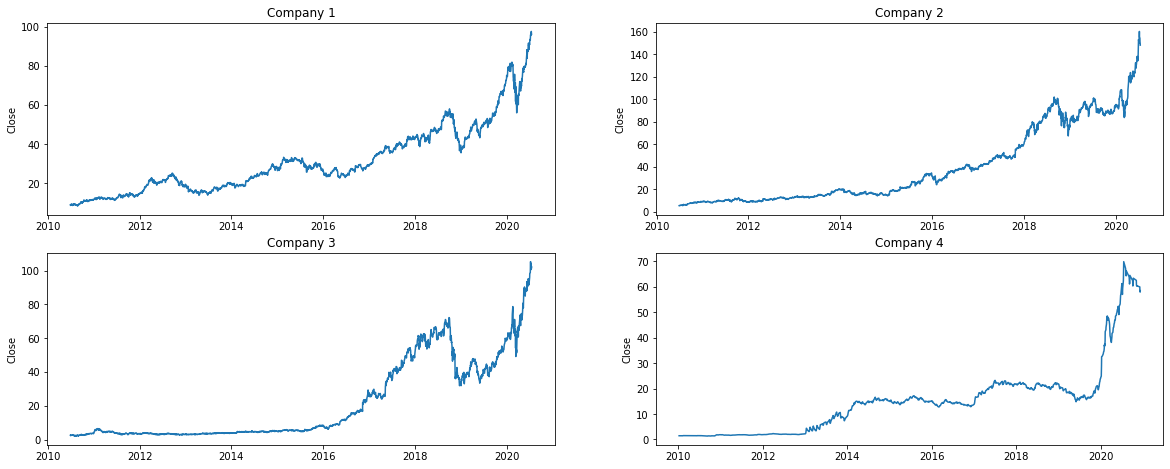

In [22]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Close"])
  plt.title(Companies_Title[index])
  plt.ylabel('Close')

In [23]:
print(df1)

           Date   Open   High    Low  Close  Adj Close        Volume
0    2010-06-29   9.50   9.47   9.23   9.04       7.93  1.133345e+09
1    2010-06-30   9.25   9.22   9.00   8.70       7.52  7.394520e+08
2    2010-07-01   9.01   9.02   8.63   8.94       7.45  1.022896e+09
3    2010-07-02   8.98   8.96   8.74   8.85       7.68  6.938428e+08
4    2010-07-06   9.13   9.13   8.61   9.36       7.68  6.152356e+08
...         ...    ...    ...    ...    ...        ...           ...
2525 2020-07-10  95.36  95.86  94.83  95.53      94.51  9.025720e+07
2526 2020-07-13  97.41  99.85  95.33  97.02      93.98  1.916492e+08
2527 2020-07-14  94.81  97.15  93.66  97.58      95.63  1.709892e+08
2528 2020-07-15  99.06  99.18  96.41  96.67      96.28  1.531980e+08
2529 2020-07-16  96.49  97.55  95.94  96.17      95.18  1.105776e+08

[2530 rows x 7 columns]


In [24]:
Moving_Average_Day = [10, 20, 50]
for Moving_Average in Moving_Average_Day:
  for company in Companies:
    column_name = f'Moving Average for {Moving_Average} days'
    company[column_name] = company["Close"].rolling(Moving_Average).mean()

In [25]:
trainset_1 = Companies[0].iloc[:,1:2].values
trainset_2 = Companies[1].iloc[:,1:2].values
trainset_3 = Companies[2].iloc[:,1:2].values
trainset_4 = Companies[3].iloc[:,1:2].values

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled_1 = sc.fit_transform(trainset_1)
training_scaled_2 = sc.fit_transform(trainset_2)
training_scaled_3 = sc.fit_transform(trainset_3)
training_scaled_4 = sc.fit_transform(trainset_4)

In [27]:
x_train_1 = []
y_train_1 = []
x_train_2 = []
y_train_2 = []
x_train_3 = []
y_train_3 = []
x_train_4 = []
y_train_4 = []

In [28]:
for i in range(60,2530):
    x_train_1.append(training_scaled_1[i-60:i, 0])
    y_train_1.append(training_scaled_1[i,0])
x_train_1,y_train_1 = np.array(x_train_1),np.array(y_train_1)

for i in range(60,2530):
    x_train_2.append(training_scaled_2[i-60:i, 0])
    y_train_2.append(training_scaled_2[i,0])
x_train_2,y_train_2 = np.array(x_train_2),np.array(y_train_2)

for i in range(60,2530):
    x_train_3.append(training_scaled_3[i-60:i, 0])
    y_train_3.append(training_scaled_3[i,0])
x_train_3,y_train_3 = np.array(x_train_3),np.array(y_train_3)

for i in range(60,2530):
    x_train_4.append(training_scaled_4[i-60:i, 0])
    y_train_4.append(training_scaled_4[i,0])
x_train_4,y_train_4 = np.array(x_train_4),np.array(y_train_4)

In [29]:
print(x_train_1.shape)

(2470, 60)


In [30]:
y_train_1.shape


(2470,)

In [31]:
x_train_1 = np.reshape(x_train_1, (x_train_1.shape[0],x_train_1.shape[1],1))
x_train_2 = np.reshape(x_train_2, (x_train_2.shape[0],x_train_2.shape[1],1))
x_train_3 = np.reshape(x_train_3, (x_train_3.shape[0],x_train_3.shape[1],1))
x_train_4 = np.reshape(x_train_4, (x_train_4.shape[0],x_train_4.shape[1],1))
#print(x_train_1.shape)

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor_1= Sequential()
regressor_1.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train_1.shape[1],1)))

regressor_1.add(Dropout(0.2))

regressor_1.add(LSTM(units = 50,return_sequences = True))
regressor_1.add(Dropout(0.2))

regressor_1.add(LSTM(units = 50,return_sequences = True))
regressor_1.add(Dropout(0.2))

regressor_1.add(LSTM(units = 50))
regressor_1.add(Dropout(0.2))

regressor_1.add(Dense(units = 1))

regressor_1.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor_1.fit(x_train_1,y_train_1,epochs = 100, batch_size = 32)

2023-02-19 11:00:00.507536: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 11:00:00.585529: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 11:00:00.586319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-19 11:00:00.588451: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/100


2023-02-19 11:00:09.017956: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


78/78 [==============================] - 8s 13ms/step - loss: 0.0080
Epoch 2/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 3/100
78/78 [==============================] - 1s 16ms/step - loss: 0.0017
Epoch 4/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0017
Epoch 5/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 6/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 7/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 8/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 9/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 10/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 11/100
78/78 [==============================] - 1s 13ms/step - loss: 9.7704e-04
Epoch 12/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 13/100
78/78 [=============

In [33]:
regressor_2= Sequential()
regressor_2.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train_2.shape[1],1)))

regressor_2.add(Dropout(0.2))

regressor_2.add(LSTM(units = 50,return_sequences = True))
regressor_2.add(Dropout(0.2))

regressor_2.add(LSTM(units = 50,return_sequences = True))
regressor_2.add(Dropout(0.2))

regressor_2.add(LSTM(units = 50))
regressor_2.add(Dropout(0.2))

regressor_2.add(Dense(units = 1))

regressor_2.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor_2.fit(x_train_2,y_train_2,epochs = 100, batch_size = 32)

Epoch 1/100
78/78 [==============================] - 6s 13ms/step - loss: 0.0076
Epoch 2/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0017
Epoch 3/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 4/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 5/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 6/100
78/78 [==============================] - 1s 15ms/step - loss: 0.0012
Epoch 7/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 8/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 9/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 10/100
78/78 [==============================] - 1s 13ms/step - loss: 9.5042e-04
Epoch 11/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0010
Epoch 12/100
78/78 [==============================] - 1s 13ms/step - loss: 9.5738e-04
Epoch 13/100
78/7

In [34]:
regressor_3= Sequential()
regressor_3.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train_3.shape[1],1)))

regressor_3.add(Dropout(0.2))

regressor_3.add(LSTM(units = 50,return_sequences = True))
regressor_3.add(Dropout(0.2))

regressor_3.add(LSTM(units = 50,return_sequences = True))
regressor_3.add(Dropout(0.2))

regressor_3.add(LSTM(units = 50))
regressor_3.add(Dropout(0.2))

regressor_3.add(Dense(units = 1))

regressor_3.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor_3.fit(x_train_3,y_train_3,epochs = 100, batch_size = 32)

Epoch 1/100
78/78 [==============================] - 5s 16ms/step - loss: 0.0073
Epoch 2/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0022
Epoch 3/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0019
Epoch 4/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 5/100
78/78 [==============================] - 1s 15ms/step - loss: 0.0014
Epoch 6/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 7/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 8/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0012
Epoch 9/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 10/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 11/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 12/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 13/100
78/78 [=====

In [35]:
regressor_4= Sequential()
regressor_4.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train_4.shape[1],1)))

regressor_4.add(Dropout(0.2))

regressor_4.add(LSTM(units = 50,return_sequences = True))
regressor_4.add(Dropout(0.2))

regressor_4.add(LSTM(units = 50,return_sequences = True))
regressor_4.add(Dropout(0.2))

regressor_4.add(LSTM(units = 50))
regressor_4.add(Dropout(0.2))

regressor_4.add(Dense(units = 1))

regressor_4.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor_4.fit(x_train_4,y_train_4,epochs = 100, batch_size = 32)

Epoch 1/100
78/78 [==============================] - 6s 14ms/step - loss: 0.0033
Epoch 2/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0022
Epoch 3/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 4/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 5/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 6/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0022
Epoch 7/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0018
Epoch 8/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 9/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 10/100
78/78 [==============================] - 1s 14ms/step - loss: 0.0020
Epoch 11/100
78/78 [==============================] - 2s 21ms/step - loss: 0.0020
Epoch 12/100
78/78 [==============================] - 1s 13ms/step - loss: 0.0019
Epoch 13/100
78/78 [=====

In [36]:
TEST = pd.read_csv("/kaggle/input/kaggle-stock-market-prediction/test.csv")

In [37]:
print(TEST["Company"][45])
opens_1 = []
opens_2 = []
opens_3 = []
opens_4 = []
High_1 = []
High_2 = []
High_3 = []
High_4 = []

Low_1 = []
Low_2 = []
Low_3 = []
Low_4 = []
Adj_1 = []
Adj_2 = []
Adj_3 = []
Adj_4 = []
Volume_1 = []
Volume_2 = []
Volume_3 = []
Volume_4 = []
dates_1 = []
dates_2 = []
dates_3 = []
dates_4 = []


dates_test= np.array(TEST["Date"])
for i in range(1, len(dates_test)):
    if TEST["Company"][i]== 1 :
        opens_1.append(TEST["Open"][i])
        High_1.append(TEST["High"][i])
        Low_1.append(TEST["Low"][i])
        Volume_1.append(TEST["Volume"][i])
        dates_1.append(TEST["Date"][i])
        Adj_1.append(TEST["Adj Close"][i])
    if TEST["Company"][i]== 2 :
        opens_2.append(TEST["Open"][i])
        High_2.append(TEST["High"][i])
        Low_2.append(TEST["Low"][i])
        Volume_2.append(TEST["Volume"][i])
        dates_2.append(TEST["Date"][i])
        Adj_2.append(TEST["Adj Close"][i])
    if TEST["Company"][i]== 3 :
        opens_3.append(TEST["Open"][i])
        High_3.append(TEST["High"][i])
        Low_3.append(TEST["Low"][i])
        Volume_3.append(TEST["Volume"][i])
        dates_3.append(TEST["Date"][i])
        Adj_3.append(TEST["Adj Close"][i])
    if TEST["Company"][i]== 4 :
        opens_4.append(TEST["Open"][i])
        High_4.append(TEST["High"][i])
        Low_4.append(TEST["Low"][i])
        Volume_4.append(TEST["Volume"][i])
        dates_4.append(TEST["Date"][i])
        Adj_4.append(TEST["Adj Close"][i])
        
TEST_1 = pd.DataFrame({"Date":dates_1,"Open":opens_1, "High":High_1, "Low":Low_1,"Adj Close":Adj_1,"Volume":Volume_1}) 
TEST_2 = pd.DataFrame({"Date":dates_2,"Open":opens_2, "High":High_2, "Low":Low_2,"Adj Close":Adj_2,"Volume":Volume_2})        
TEST_3 = pd.DataFrame({"Date":dates_3,"Open":opens_3, "High":High_3, "Low":Low_3,"Adj Close":Adj_3,"Volume":Volume_3})        
TEST_4 = pd.DataFrame({"Date":dates_4,"Open":opens_4, "High":High_4, "Low":Low_4,"Adj Close":Adj_4,"Volume":Volume_4})        

4.0


In [38]:
TEST_1

,Date,Open,High,Low,Adj Close,Volume
0,2020-07-17,97.01,97.15,95.86,94.73,92186800.0
1,2020-07-20,96.56,98.67,96.04,96.68,90318000.0
2,2020-07-21,99.16,99.21,96.73,95.51,103433200.0
3,2020-07-22,96.68,98.15,96.74,95.74,89001600.0
4,2020-07-23,96.85,96.94,92.13,91.27,197004400.0
...,...,...,...,...,...,...
628,2023-01-13,132.12,134.89,131.71,134.75,57758000.0
629,2023-01-17,134.81,137.24,134.02,136.11,63646600.0
630,2023-01-18,136.82,138.61,135.19,135.12,69672800.0
631,2023-01-19,134.00,136.21,133.71,135.28,58280400.0


In [39]:
# set_1 = TEST_1.iloc[:,1:2].values
# set_2 = TEST_2.iloc[:,1:2].values
# set_3 = TEST_3.iloc[:,1:2].values
# set_4 = TEST_4.iloc[:,1:2].values

In [40]:
#  from sklearn.preprocessing import MinMaxScaler
#  sc = MinMaxScaler(feature_range = (0,1))
#  TEST_scaled_1 = sc.fit_transform(set_1)
#  TEST_scaled_2 = sc.fit_transform(set_2)
#  TEST_scaled_3 = sc.fit_transform(set_3)
#  TEST_scaled_4 = sc.fit_transform(set_4)

In [41]:
# x_test_1 =np.array(TEST_scaled_1)
# x_test_2 =np.array(TEST_scaled_2)
# x_test_3 =np.array(TEST_scaled_3)
# x_test_4 =np.array(TEST_scaled_4)





In [42]:
real_stock_price_1 = TEST_1.iloc[:,1:2].values
real_stock_price_2 = TEST_2.iloc[:,1:2].values
real_stock_price_3 = TEST_3.iloc[:,1:2].values
real_stock_price_4 = TEST_4.iloc[:,1:2].values

dataset_total_1 = pd.concat((Companies[0]['Open'],TEST_1['Open']),axis = 0)
dataset_total_2 = pd.concat((Companies[1]['Open'],TEST_2['Open']),axis = 0)
dataset_total_3 = pd.concat((Companies[2]['Open'],TEST_3['Open']),axis = 0)
dataset_total_4 = pd.concat((Companies[3]['Open'],TEST_4['Open']),axis = 0)
dataset_total_1 

0        9.50
1        9.25
2        9.01
3        8.98
4        9.13
        ...  
628    132.12
629    134.81
630    136.82
631    134.00
632    135.35
Name: Open, Length: 3163, dtype: float64

In [43]:
inputs_1 = dataset_total_1[len(dataset_total_1) - len(TEST_1)-60:].values
inputs_2 = dataset_total_2[len(dataset_total_2) - len(TEST_2)-60:].values
inputs_3 = dataset_total_3[len(dataset_total_3) - len(TEST_3)-60:].values
inputs_4 = dataset_total_4[len(dataset_total_4) - len(TEST_4)-60:].values
inputs_1

array([ 68.51,  69.08,  69.31,  70.37,  71.27,  71.17,  72.53,  71.4 ,
        72.4 ,  73.9 ,  74.99,  75.92,  76.42,  77.04,  79.47,  78.06,
        76.01,  75.14,  78.22,  78.91,  79.16,  79.67,  78.86,  81.  ,
        78.96,  79.08,  79.91,  79.48,  80.1 ,  81.28,  80.96,  80.89,
        82.74,  83.  ,  87.02,  87.23,  86.34,  83.3 ,  87.86,  88.8 ,
        87.77,  88.69,  87.87,  91.02,  91.21,  90.36,  91.2 ,  88.47,
        89.99,  91.25,  91.89,  92.51,  93.86,  94.19,  96.18,  95.36,
        97.41,  94.81,  99.06,  96.49,  97.01,  96.56,  99.16,  96.68,
        96.85,  91.03,  93.78,  94.25,  93.79,  94.42, 103.08, 108.09,
       109.17, 109.23, 110.53, 113.09, 112.46, 112.01, 110.52, 114.44,
       114.85, 116.22, 114.31, 115.89, 115.66, 119.25, 128.59, 124.59,
       126.28, 127.23, 125.96, 127.5 , 132.68, 137.53, 126.96, 120.05,
       114.1 , 117.16, 120.31, 114.46, 114.75, 118.38, 115.23, 109.71,
       110.45, 104.6 , 112.59, 111.42, 105.05, 108.55, 114.94, 114.55,
      

In [44]:
inputs_1 = inputs_1.reshape(-1,1)
inputs_2 = inputs_2.reshape(-1,1)
inputs_3 = inputs_3.reshape(-1,1)
inputs_4 = inputs_4.reshape(-1,1)

In [45]:
inputs_1 = sc.transform(inputs_1)
inputs_2 = sc.transform(inputs_2)
inputs_3 = sc.transform(inputs_3)
inputs_4 = sc.transform(inputs_4)
inputs_1.shape

(693, 1)

In [46]:
x_test_1 = []
for i in range(60,693):
    x_test_1.append(inputs_1[i-60:i,0])
    
x_test_1 = np.array(x_test_1)
x_test_1 = np.reshape(x_test_1, (x_test_1.shape[0],x_test_1.shape[1],1))
predicted_price_1 = regressor_1.predict(x_test_1)
predicted_price_1 = sc.inverse_transform(predicted_price_1)

x_test_2 = []
for i in range(60,693):
    x_test_2.append(inputs_2[i-60:i,0])
    
x_test_2 = np.array(x_test_2)
x_test_2 = np.reshape(x_test_2, (x_test_2.shape[0],x_test_2.shape[1],1))
predicted_price_2 = regressor_2.predict(x_test_2)
predicted_price_2 = sc.inverse_transform(predicted_price_2)

x_test_3 = []
for i in range(60,693):
    x_test_3.append(inputs_3[i-60:i,0])
    
x_test_3 = np.array(x_test_3)
x_test_3 = np.reshape(x_test_3, (x_test_3.shape[0],x_test_3.shape[1],1))
predicted_price_3 = regressor_3.predict(x_test_3)
predicted_price_3 = sc.inverse_transform(predicted_price_3)

x_test_4 = []
for i in range(60,693):
    x_test_4.append(inputs_4[i-60:i,0])
    
x_test_4 = np.array(x_test_4)
x_test_4 = np.reshape(x_test_4, (x_test_4.shape[0],x_test_4.shape[1],1))
predicted_price_4 = regressor_4.predict(x_test_4)
predicted_price_4 = sc.inverse_transform(predicted_price_4)

predicted_price_1.shape
predicted_price_2.shape
predicted_price_3.shape
predicted_price_4.shape


   

(633, 1)

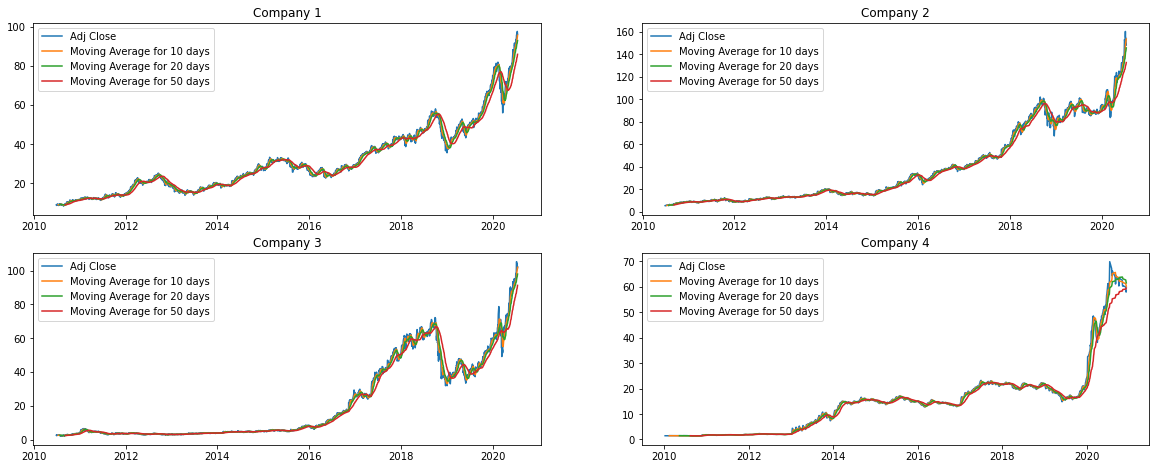

In [47]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Close"])
  plt.plot(company["Date"], company["Moving Average for 10 days"])
  plt.plot(company["Date"], company["Moving Average for 20 days"])
  plt.plot(company["Date"], company["Moving Average for 50 days"])
  plt.title(Companies_Title[index])
  plt.legend(("Adj Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"))

In [48]:
pred = []
pred= np.append(pred,predicted_price_4)
pred= np.append(pred,predicted_price_3)
pred=np.append(pred,predicted_price_1)
pred= np.append(pred,predicted_price_2)
#pred = np.array(pred)
#pred.reshape(2530,1)
Id = np.array(TEST["ID"])
submission_df= pd.DataFrame({"Id":Id, "Close":pred})
submission_df
#Companies[3] = pd.DataFrame({"Date":dates,"Open":opens, "High":High, "Low":Low,"Adj Close":Adj,"Volume":Volume, "Close": a})

,Id,Close
0,0,57.699680
1,1,68.165161
2,2,70.398087
3,3,68.941154
4,4,69.722054
...,...,...
2527,2527,91.633476
2528,2528,94.410278
2529,2529,96.440536
2530,2530,96.783142


In [49]:
submission_df.to_csv('submission.csv',index=False)

In [50]:
# train_data, test_data = df1[0:int(len(df1)*0.7)], df1[int(len(df1)*0.7):]
# training_data = train_data['Close'].values
# test_data = test_data['Close'].values
# history = [x for x in training_data]
# model_predictions = []
# N_test_observations = len(test_data)
# for time_point in range(N_test_observations):
#     model = ARIMA(history, order=(4,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     model_predictions.append(yhat)
#     true_test_value = test_data[time_point]
#     history.append(true_test_value)
# MSE_error = mean_squared_error(test_data, model_predictions)
# print('Testing Mean Squared Error is {}'.format(MSE_error))

In [51]:
# AAPL = Companies[0]

In [52]:
# def Dataset(Data, Date):

#   Train_Data = Data['Close'][Data['Date'] < Date].to_numpy()
#   Data_Train = []
#   Data_Train_X = []
#   Data_Train_Y = []
#   for i in range(0, len(Train_Data), 5):
#     try:
#       Data_Train.append(Train_Data[i : i + 5])
#     except:
#       pass

#   if len(Data_Train[-1]) < 5:
#     Data_Train.pop(-1)
  
#   Data_Train_X = Data_Train[0 : -1]
#   Data_Train_X = np.array(Data_Train_X)
#   Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
#   Data_Train_Y = Data_Train[1 : len(Data_Train)]
#   Data_Train_Y = np.array(Data_Train_Y)
#   Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


#   Test_Data = Data['Adj Close'][Data['Date'] >= Date].to_numpy()
#   Data_Test = []
#   Data_Test_X = []
#   Data_Test_Y = []
#   for i in range(0, len(Test_Data), 5):
#     try:
#       Data_Test.append(Test_Data[i : i + 5])
#     except:
#       pass

#   if len(Data_Test[-1]) < 5:
#     Data_Test.pop(-1)
  
#   Data_Test_X = Data_Test[0 : -1]
#   Data_Test_X = np.array(Data_Test_X)
#   Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
#   Data_Test_Y = Data_Test[1 : len(Data_Test)]
#   Data_Test_Y = np.array(Data_Test_Y)
#   Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

#   return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

In [53]:
# def Model():
#   model = tf.keras.models.Sequential([
#                                       tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
#                                       tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
#                                       tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
#                                       tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
#                                       tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
#                                       tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
#                                       ])
#   return model

In [54]:
# model = Model()

In [55]:
# tf.keras.utils.plot_model(model, show_shapes=True)

In [56]:
# model.summary()

In [57]:
# def scheduler(epoch):
  
#   if epoch <= 150:
#     lrate = (10 ** -5) * (epoch / 150) 
#   elif epoch <= 400:
#     initial_lrate = (10 ** -5)
#     k = 0.01
#     lrate = initial_lrate * math.exp(-k * (epoch - 150))
#   else:
#     lrate = (10 ** -6)
  
#   return lrate

In [58]:
# epochs = [i for i in range(1, 1001, 1)]
# lrate = [scheduler(i) for i in range(1, 1001, 1)]
# plt.plot(epochs, lrate)

In [59]:
# callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [60]:
# AAPL.head()

In [61]:
# AAPL.info()

In [62]:
# AAPL["Date"] = pd.to_datetime(AAPL["Date"])

In [63]:
# AAPL_Date = '2019-10-01'
# AAPL_Train_X, AAPL_Train_Y, AAPL_Test_X, AAPL_Test_Y = Dataset(AAPL, AAPL_Date)

In [64]:
# AAPL_Model = Model()

In [65]:
# AAPL_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())

In [66]:
# AAPL_hist = AAPL_Model.fit(AAPL_Train_X, AAPL_Train_Y, epochs = 1000, validation_data = (AAPL_Test_X, AAPL_Test_Y), callbacks=[callback])


In [67]:
# history_dict = AAPL_hist.history

# loss = history_dict["loss"]
# root_mean_squared_error = history_dict["root_mean_squared_error"]
# val_loss = history_dict["val_loss"]
# val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

# epochs = range(1, len(loss) + 1)

In [68]:
# fig, (ax1, ax2) = plt.subplots(1, 2)

# fig.set_figheight(5)
# fig.set_figwidth(15)

# ax1.plot(epochs, loss, label = 'Training Loss')
# ax1.plot(epochs, val_loss, label = 'Validation Loss')
# ax1.set(xlabel = "Epochs", ylabel = "Loss")
# ax1.legend()

# ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
# ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
# ax2.set(xlabel = "Epochs", ylabel = "Loss")
# ax2.legend()

# plt.show()

In [69]:
# import pickle
# filename = 'model_1.sav'
# pickle.dump(AAPL_Model, open(filename, 'wb'))

In [70]:
# AAPL_prediction = AAPL_Model.predict(AAPL_Test_X)

In [71]:
# plt.figure(figsize=(20, 5))
# plt.plot(AAPL['Date'][AAPL['Date'] < '2019-10-12'], AAPL['Close'][AAPL['Date'] < '2019-10-12'], label = 'Training')
# plt.plot(AAPL['Date'][AAPL['Date'] >= '2019-10-09'], AAPL['Close'][AAPL['Date'] >= '2019-10-09'], label = 'Testing')
# plt.plot(AAPL['Date'][AAPL['Date'] >= '2019-10-09'], AAPL_prediction.reshape(-1), label = 'Predictions')
# plt.xlabel('Time')
# plt.ylabel('Closing Price')
# plt.legend(loc = 'best')

In [72]:
# rmse = math.sqrt(mean_squared_error(AAPL_Test_Y.reshape(-1, 5), AAPL_prediction))
# mape = np.mean(np.abs(AAPL_prediction - AAPL_Test_Y.reshape(-1, 5))/np.abs(AAPL_Test_Y.reshape(-1, 5)))
# print(f'RMSE: {rmse}')
# print(f'MAPE: {mape}')

In [73]:
# TSLA= Companies[1]

In [74]:
# TSLA["Date"] = pd.to_datetime(TSLA["Date"])
# TSLA_Date = '2020-10-01'
# TSLA_Train_X, TSLA_Train_Y, TSLA_Test_X, TSLA_Test_Y = Dataset(TSLA, TSLA_Date)
# TSLA_Model = Model()
     

# TSLA_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
     

# TSLA_hist = TSLA_Model.fit(TSLA_Train_X, TSLA_Train_Y, epochs = 200, validation_data = (TSLA_Test_X, TSLA_Test_Y), callbacks=[callback])
     

# history_dict = TSLA_hist.history

# loss = history_dict["loss"]
# root_mean_squared_error = history_dict["root_mean_squared_error"]
# val_loss = history_dict["val_loss"]
# val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

# epochs = range(1, len(loss) + 1)
     

# fig, (ax1, ax2) = plt.subplots(1, 2)

# fig.set_figheight(5)
# fig.set_figwidth(15)

# ax1.plot(epochs, loss, label = "Training Loss")
# ax1.plot(epochs, val_loss, label = "Validation Loss")
# ax1.set(xlabel = "Epochs", ylabel = "Loss")
# ax1.legend()

# ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
# ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
# ax2.set(xlabel = "Epochs", ylabel = "Loss")
# ax2.legend()

# plt.show()

In [75]:
# import pickle
# filename = 'model_2.sav'
# pickle.dump(TSLA_Model, open(filename, 'wb'))

In [76]:
# GOOG = Companies[2]
# MSFT= Companies[3]

In [77]:
# GOOG["Date"] = pd.to_datetime(GOOG["Date"])
# GOOG_Date = '2020-11-01'
# GOOG_Train_X, GOOG_Train_Y, GOOG_Test_X, GOOG_Test_Y = Dataset(GOOG, GOOG_Date)

In [78]:
# GOOG_Model = Model()
     

# GOOG_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
     

# GOOG_hist = GOOG_Model.fit(GOOG_Train_X, GOOG_Train_Y, epochs = 1000, validation_data = (GOOG_Test_X, GOOG_Test_Y), callbacks = [callback])
     

# history_dict = GOOG_hist.history

# loss = history_dict["loss"]
# root_mean_squared_error = history_dict["root_mean_squared_error"]
# val_loss = history_dict["val_loss"]
# val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

# epochs = range(1, len(loss) + 1)
     

# fig, (ax1, ax2) = plt.subplots(1, 2)

# fig.set_figheight(5)
# fig.set_figwidth(15)

# ax1.plot(epochs, loss, label = "Training Loss")
# ax1.plot(epochs, val_loss, label = "Validation Loss")
# ax1.set(xlabel = "Epochs", ylabel = "Loss")
# ax1.legend()

# ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
# ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
# ax2.set(xlabel = "Epochs", ylabel = "Loss")
# ax2.legend()

# plt.show()

In [79]:
# import pickle
# filename = 'model_3.sav'
# pickle.dump(GOOG_Model, open(filename, 'wb'))

In [80]:
# MSFT["Date"] = pd.to_datetime(MSFT["Date"])
# MSFT_Date = '2020-10-01'
# MSFT_Train_X, MSFT_Train_Y, MSFT_Test_X, MSFT_Test_Y = Dataset(MSFT, MSFT_Date)

In [81]:
# MSFT_Model = Model()
     

# MSFT_Model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = tf.keras.metrics.RootMeanSquaredError())
     

# MSFT_hist = MSFT_Model.fit(MSFT_Train_X, MSFT_Train_Y, epochs = 1000, validation_data = (MSFT_Test_X, MSFT_Test_Y), callbacks=[callback])
     

# history_dict = MSFT_hist.history

# loss = history_dict["loss"]
# root_mean_squared_error = history_dict["root_mean_squared_error"]
# val_loss = history_dict["val_loss"]
# val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

# epochs = range(1, len(loss) + 1)
     

# fig, (ax1, ax2) = plt.subplots(1, 2)

# fig.set_figheight(5)
# fig.set_figwidth(15)

# ax1.plot(epochs, loss, label = "Training Loss")
# ax1.plot(epochs, val_loss, label = "Validation Loss")
# ax1.set(xlabel = "Epochs", ylabel = "Loss")
# ax1.legend()

# ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
# ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
# ax2.set(xlabel = "Epochs", ylabel = "Loss")
# ax2.legend()

# plt.show()

In [82]:
# import pickle
# filename = 'model_4.sav'
# pickle.dump(MSFT_Model, open(filename, 'wb'))